# To surplus Warnings

In [27]:
import warnings
warnings.filterwarnings("ignore", message="deprecated")
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Manual EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("matches.csv")
data.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# How big is the dataset? (Rows and columns)
data.shape
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
# Statistical Description of dataset
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [6]:
# Finding Unique
data.nunique()

id                 756
Season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [7]:
# How many IPL seasons are we using to analyse?**
data['Season'].unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [8]:
# Finding out NaN values
data.isna().any()
data.isna().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
# Indexing Dataframe
data['city'].isna().sum()


7

In [10]:
# retrieving all rows and some columns by loc method
first = data.loc[:, ["id", "city"]]
# retrieving rows by iloc method 
row2 = data.iloc [:, [1, 2]]
# retrieving multiple rows by iloc method 
row2 = data.iloc [[3, 5, 7]]


In [11]:
row3=data.iloc[:, :]

# How many matches (in total) were played according to the dataset?
data['id'].count()

756

In [12]:
# Which IPL team won by scoring the maximum runs?
data['win_by_runs'].idxmax()


43

In [13]:
# Which IPL team won by taking minimum wickets?
data.iloc[data['win_by_wickets'].idxmax()]
data.iloc[data['win_by_wickets'].idxmin()]


id                                                         1
Season                                              IPL-2017
city                                               Hyderabad
date                                              05-04-2017
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

In [14]:
b=data.groupby('Season')
b=data.groupby(['Season','city'])


In [15]:
# Highest wins by teams per season
data.groupby('Season')['winner'].value_counts()
data['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [16]:
# Man of the match - Highest to lowest (in won matches)
data['player_of_match'].value_counts()


CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

In [17]:
# In which city were the number of matches played?
data['city'].value_counts()


Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

C:\Users\ATA UMER\AppData\Local\Temp\ipykernel_13496\828414878.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['win_by_wickets'], kde = True)


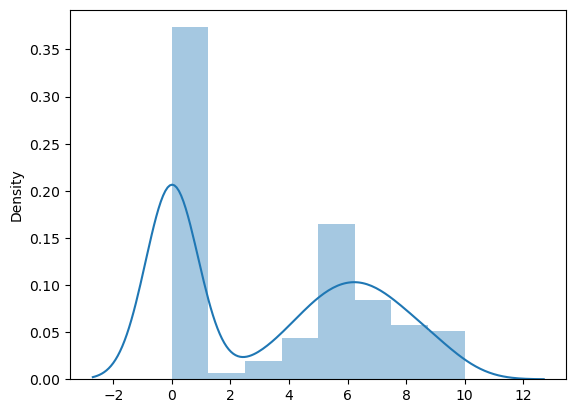

In [18]:
#number of observations that fall in each bin.
sns.distplot(x=data['win_by_wickets'], kde = True)
plt.show()


In [19]:
a=((data['win_by_wickets'] == 2).sum())

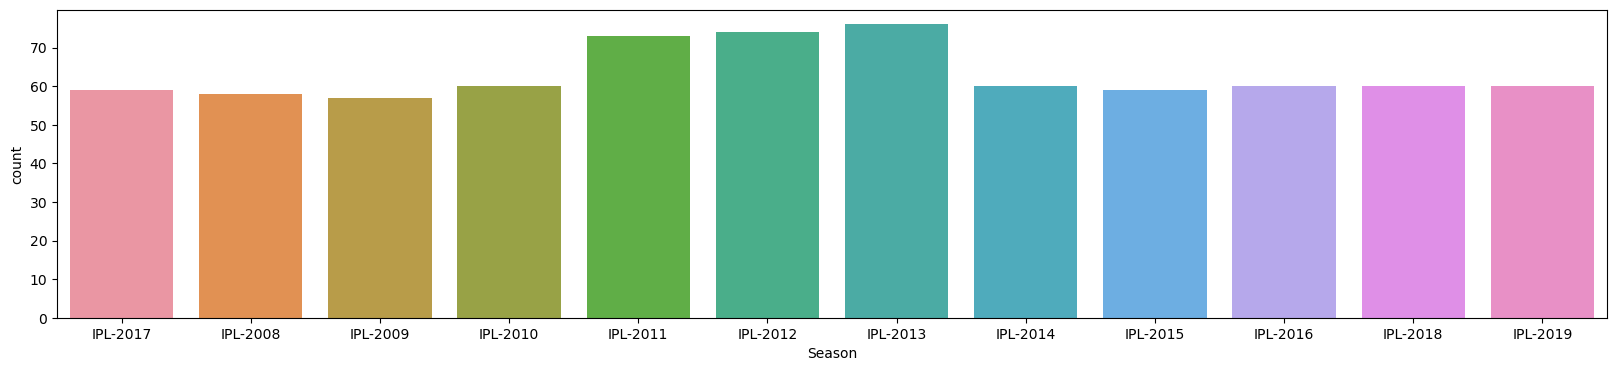

In [20]:
# Which season consisted of the highest number of matches ever played?
fig_dims = (20, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='Season', ax=ax,data=data)
plt.show()



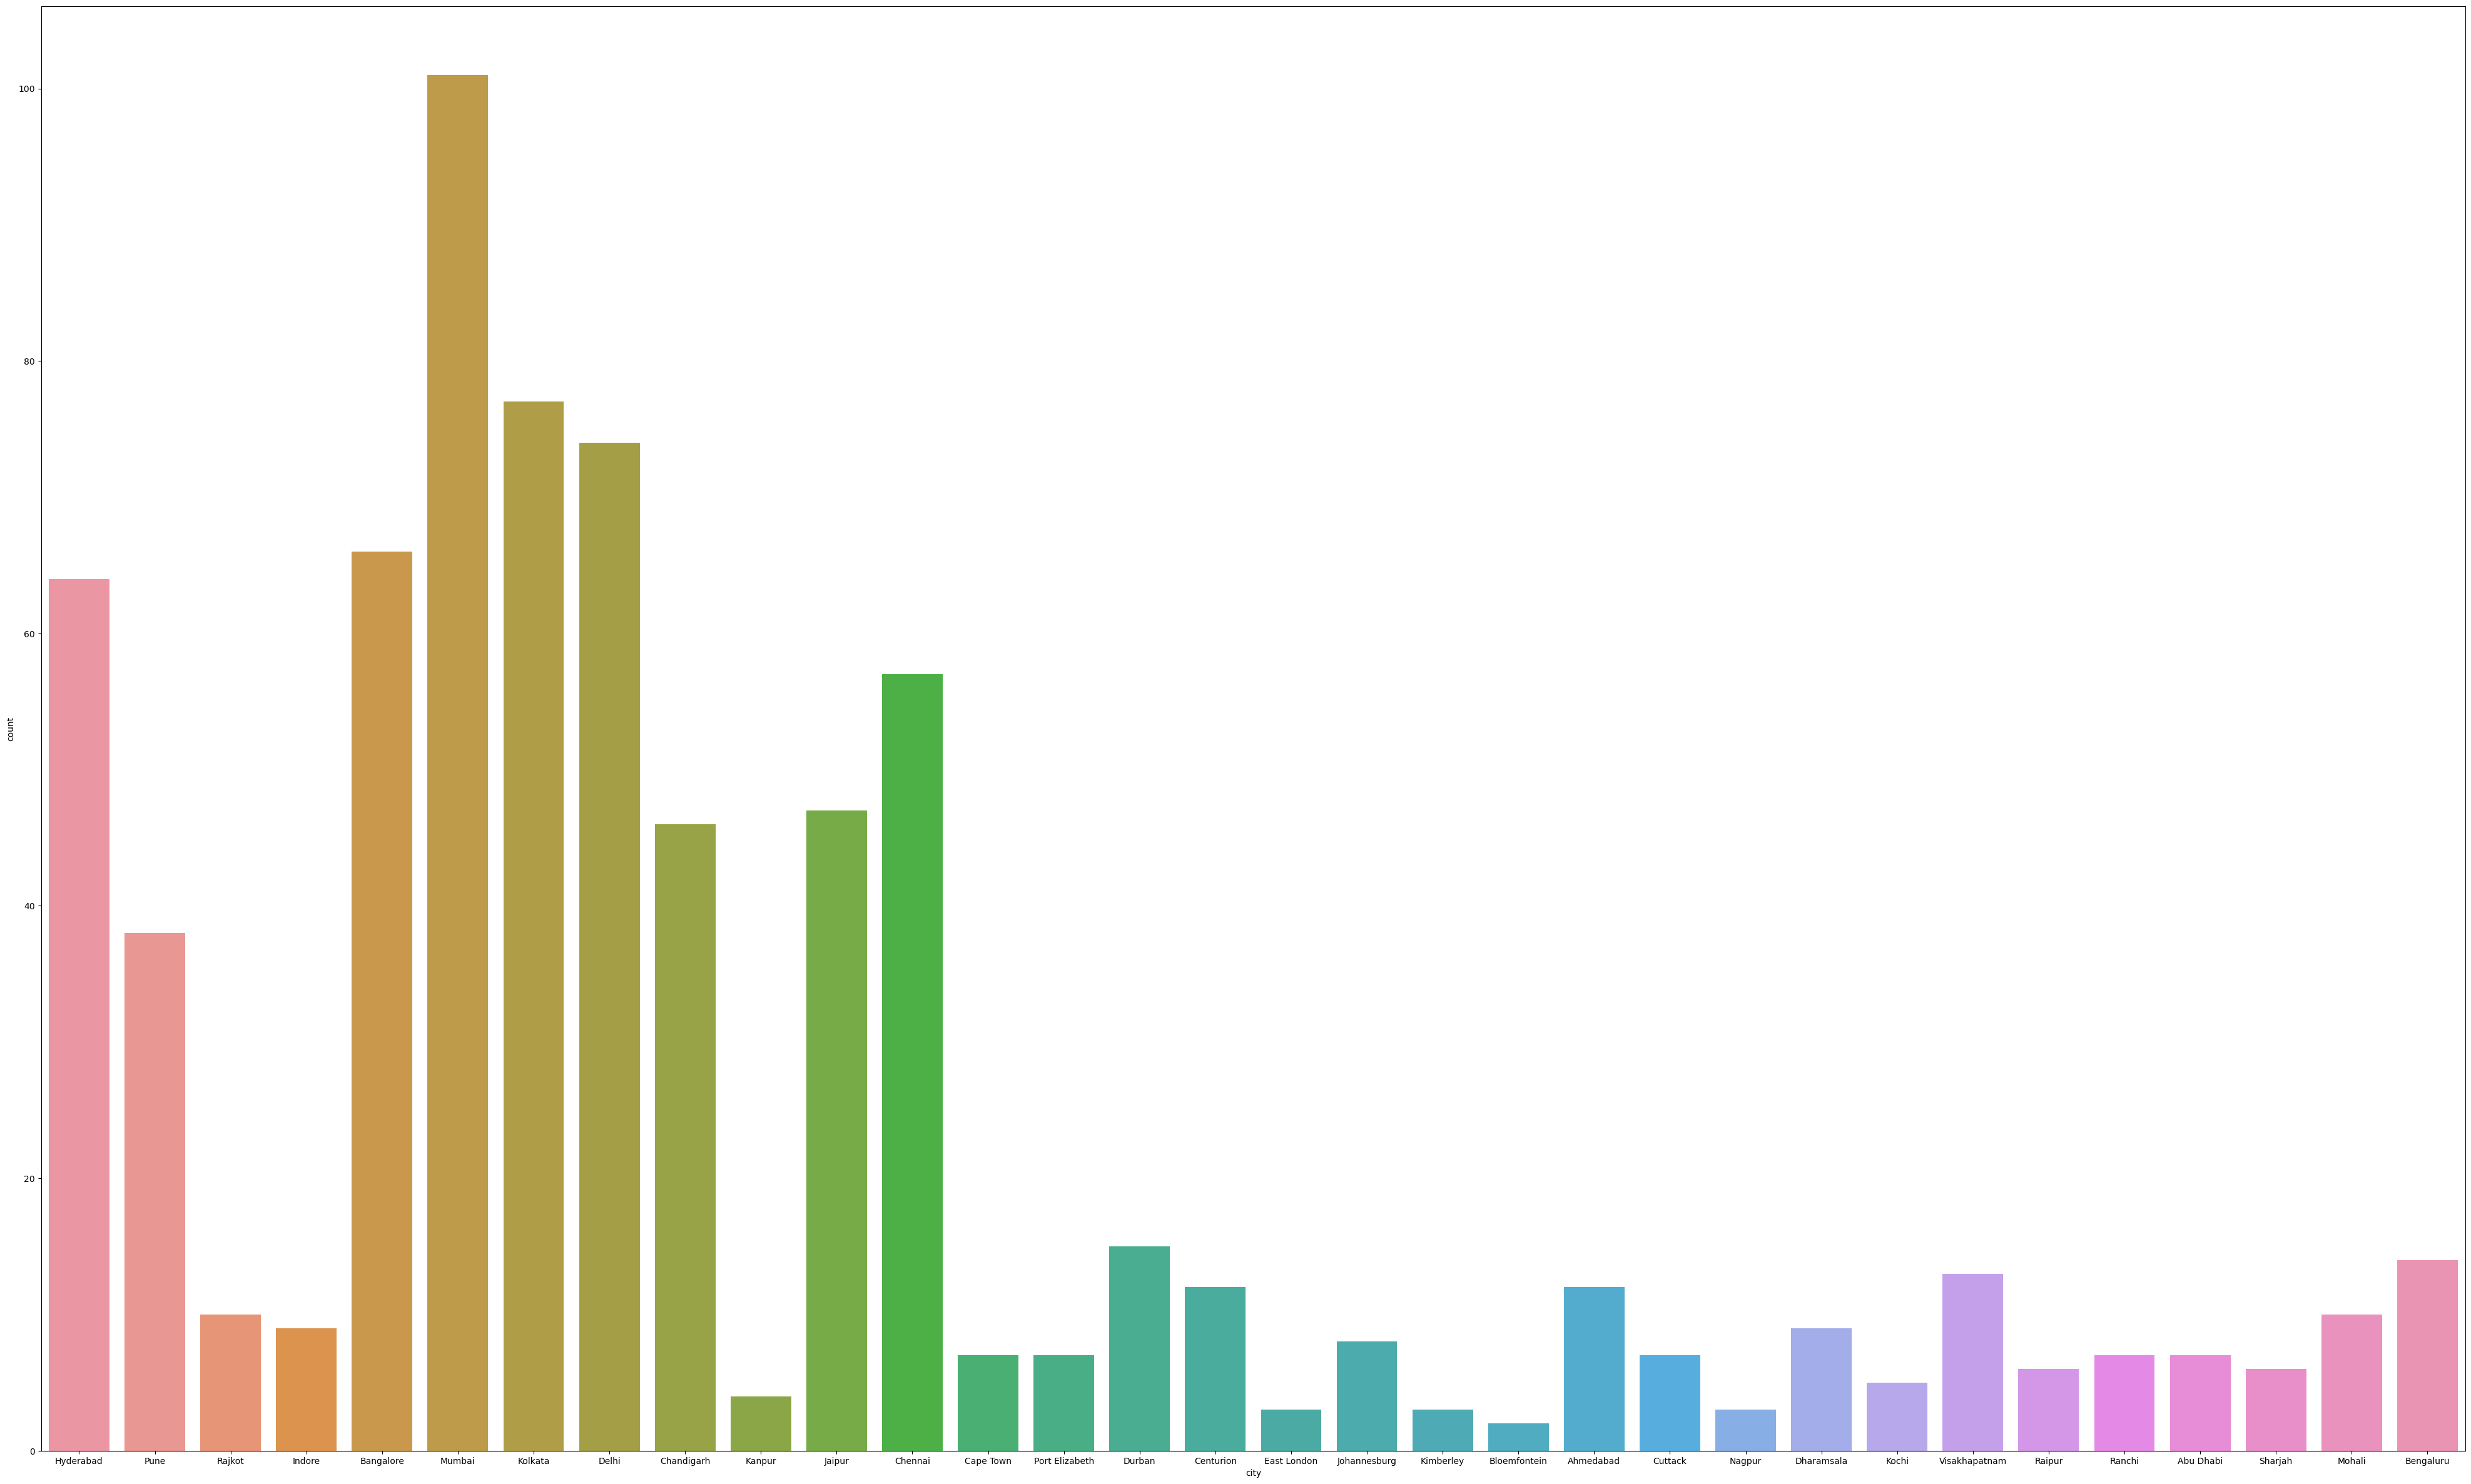

In [21]:
# Which city consisted of the highest number of matches ever played?
fig_dims = (50, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='city', ax=ax,data=data)
plt.show()


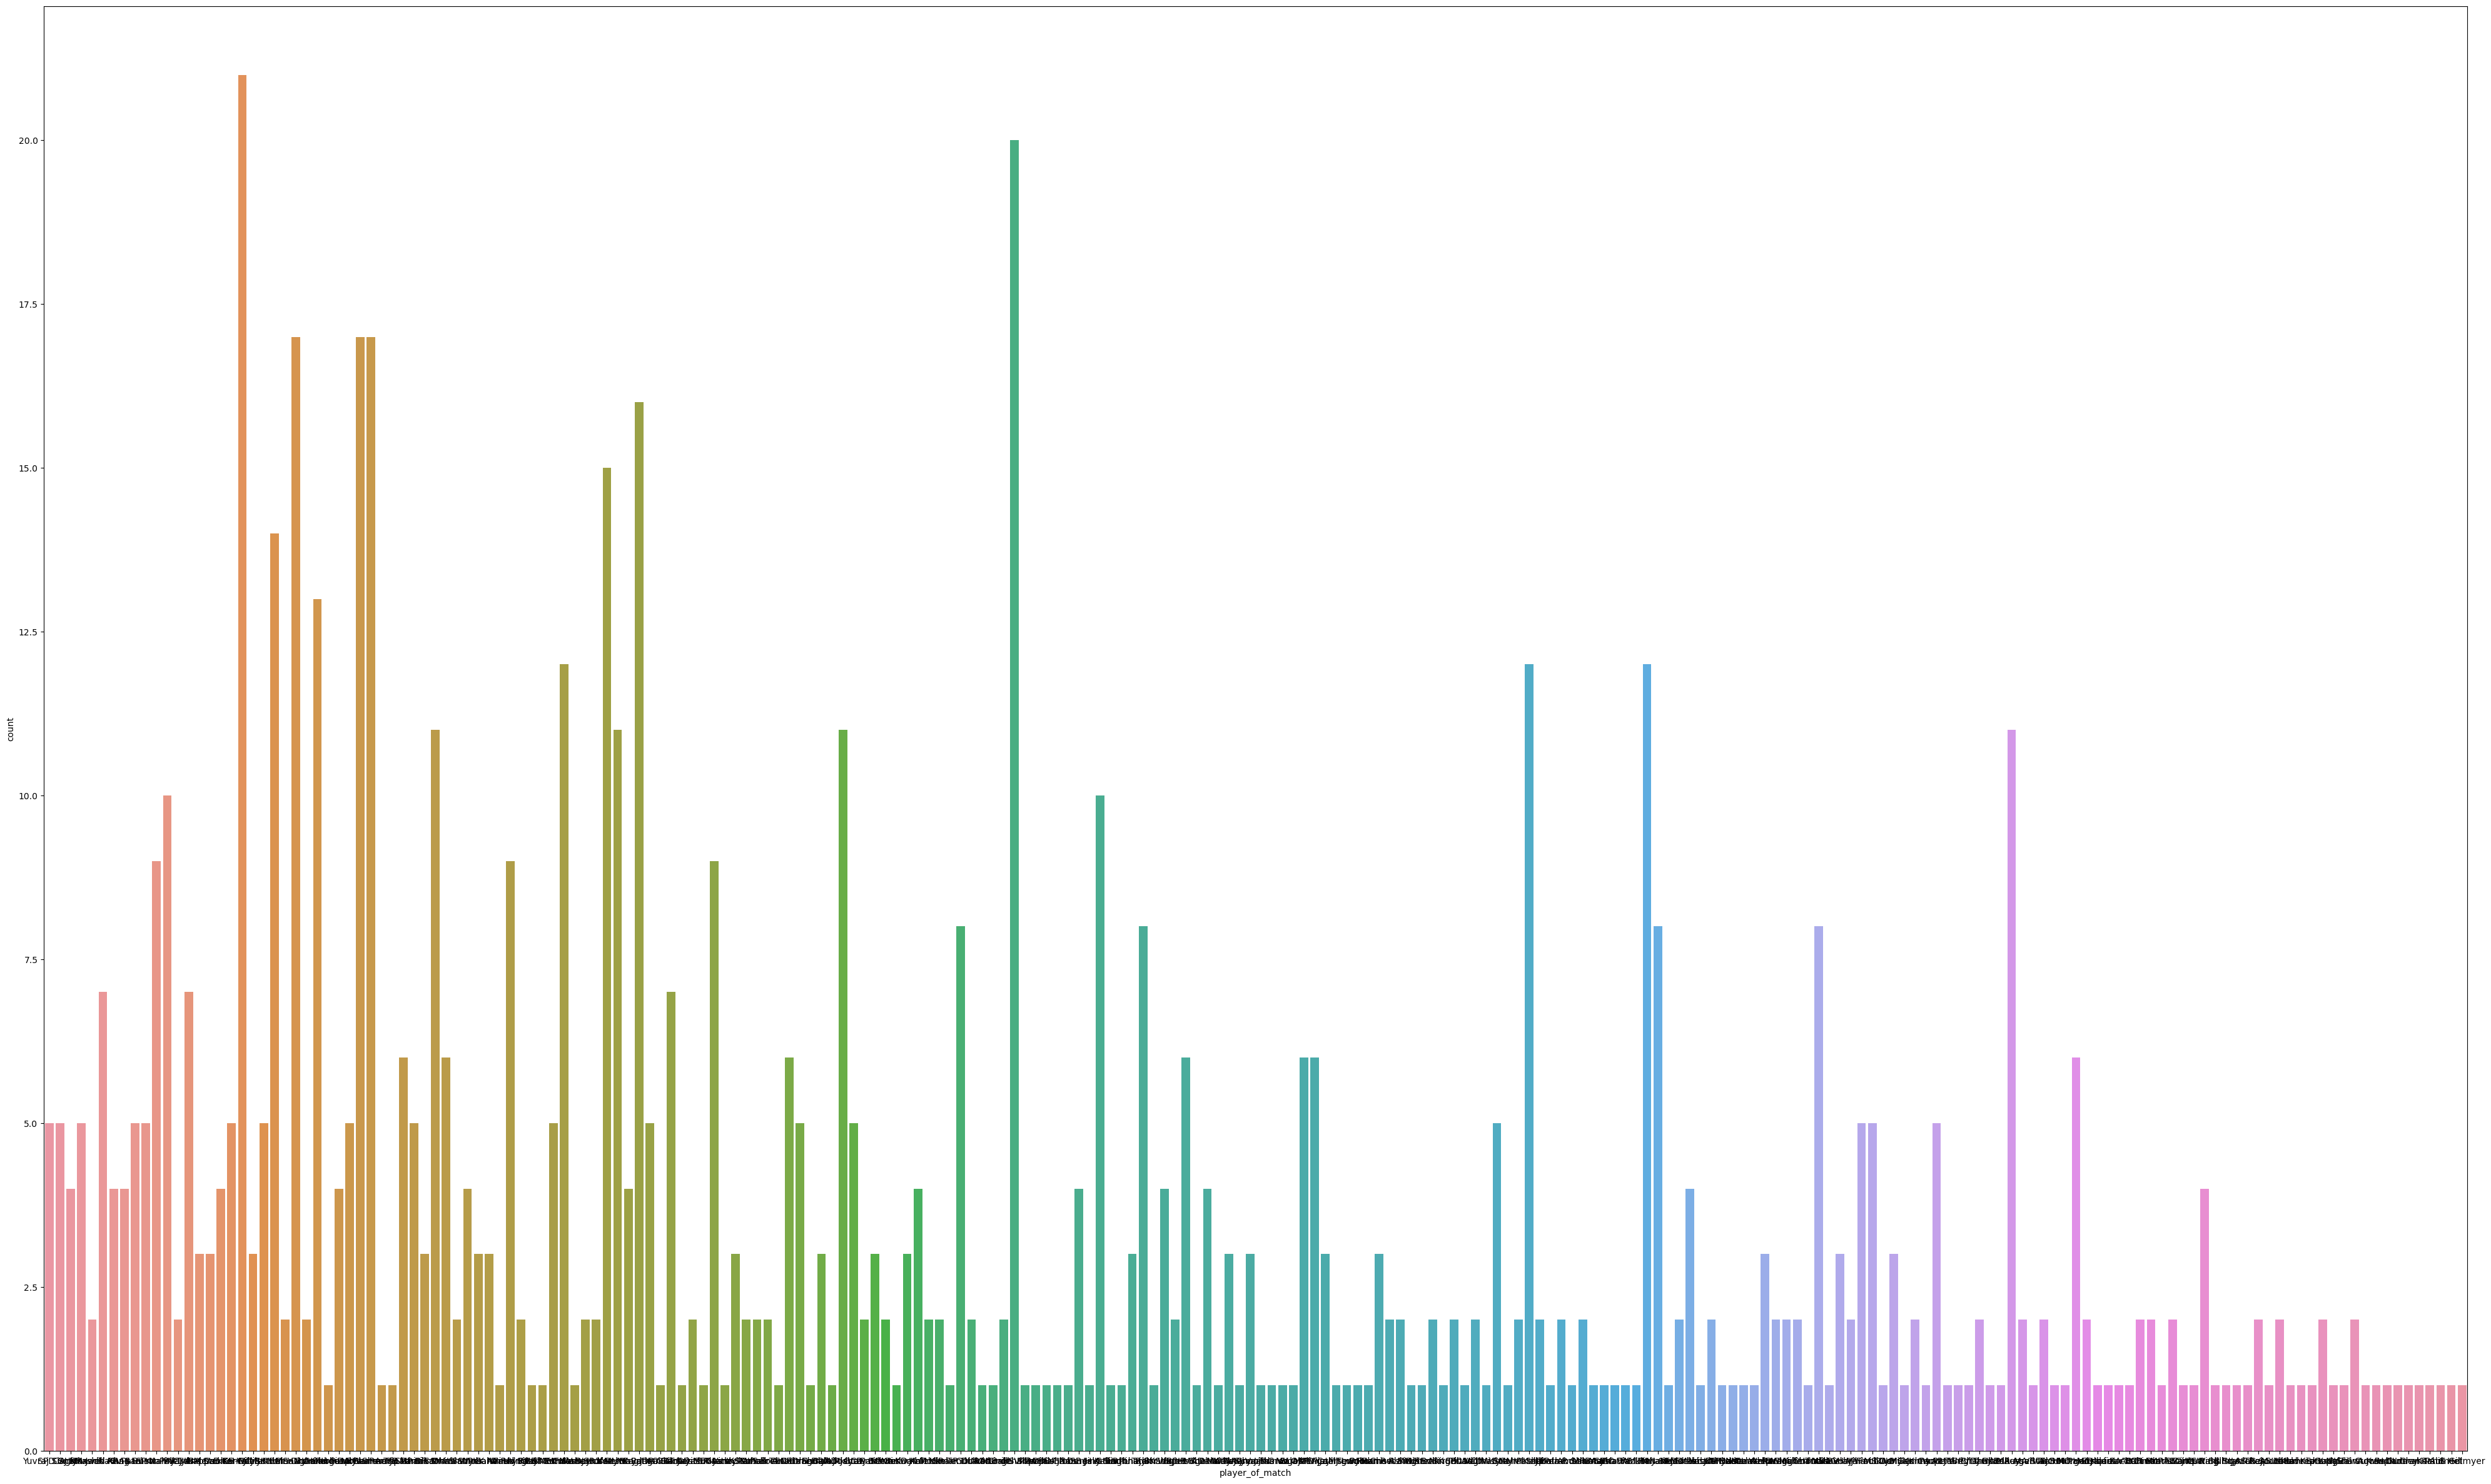

In [22]:
aa=data['player_of_match'].value_counts()

# Which player_of_match won number of matches ever played?
fig_dims = (50, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='player_of_match', ax=ax,data=data)
plt.show()


# Automated EDA

In [23]:
import pandas as pd
dataset = pd.read_csv('matches.csv')

In [28]:
# DATA PREP using dataprep
from dataprep.eda import create_report
# Generate the report
reports = create_report(dataset)
# Show the report in the browser
reports.show_browser()
# Save the report to anaconda
#reports.save('report.html')


  0%|          | 0/1963 [00:00<?, ?it/s]

In [29]:
# EDA using sweetviz
import sweetviz as sv
# Preprocess the dataset to handle missing values
dataset = dataset.dropna()  # Drop rows with missing values or use other methods to handle missing values
# Analyze the dataset using sweetviz
sweet_report = sv.analyze(dataset)
# Generate the HTML report
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [30]:
# EDA using autoviz
from autoviz.AutoViz_Class import AutoViz_Class
# Instantiate AutoViz_Class and visualize the dataset
autoviz = AutoViz_Class()
autoviz.AutoViz(dataset)


Not able to read or load file. Please check your inputs and try again...


In [31]:
# EDA using dtale
#import dtale
# Show the dataset in the browser
#dtale.show(dataset, open_browser=True)

# Seaborn EDA

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


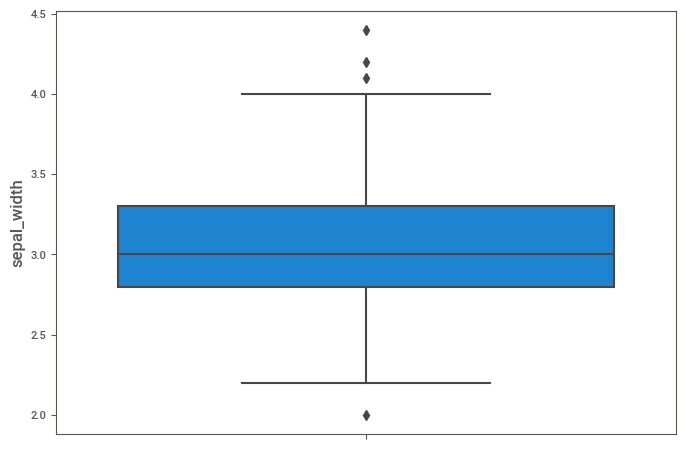

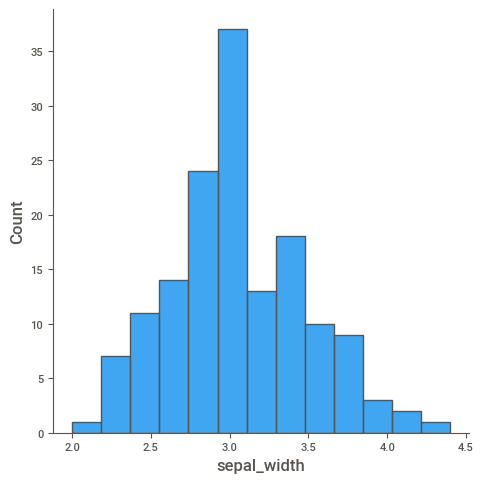

In [33]:
c=sns.load_dataset('iris')
#Box Plot
sns.boxplot( y=c["sepal_width"] )
#Density Plot
sns.displot(x=c["sepal_width"])


In [40]:
a=sns.load_dataset('flights')

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

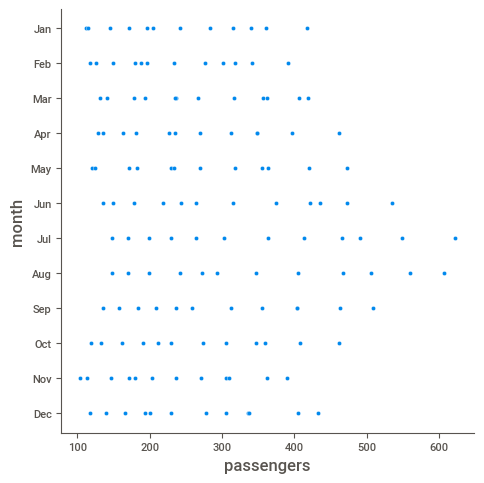

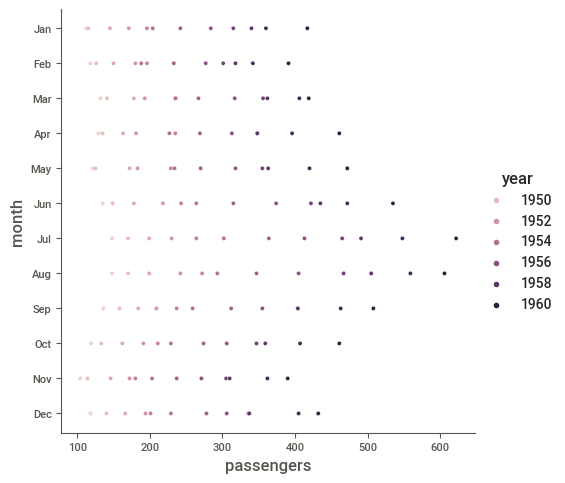

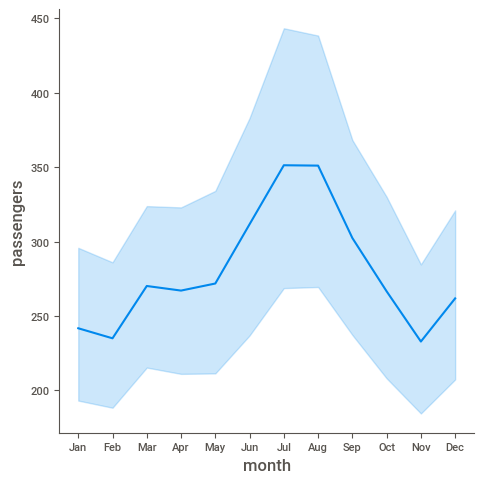

In [35]:
#Visualizing Statical Relationship
sns.relplot(x='passengers',y='month',data=a)
sns.relplot(x='passengers',y='month',hue='year',data=a)
sns.relplot(x='month',y='passengers',kind='line',data=a)


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

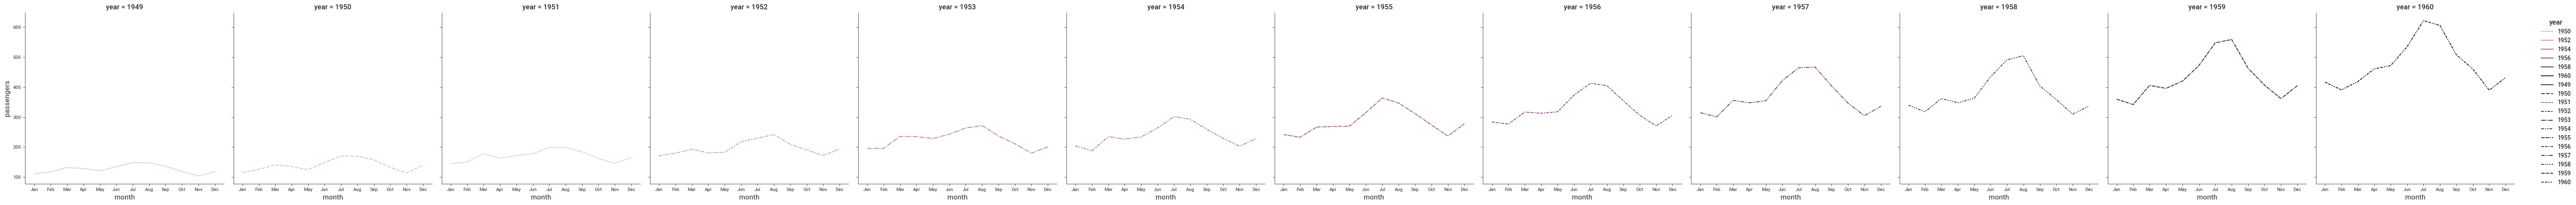

In [36]:
sns.relplot(data=a, x="month", y="passengers", col="year",hue="year", style="year", kind="line",)


<AxesSubplot:xlabel='passengers'>

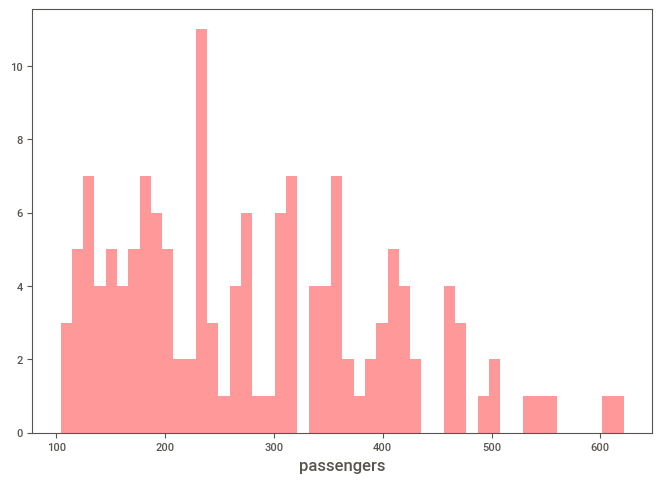

In [41]:
#Visualizing Distribution Data joinplot
sns.distplot(a['passengers'], kde = False, color ='red', bins = 50)


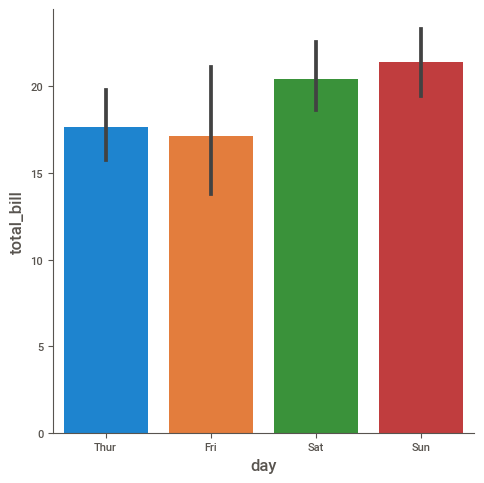

In [42]:
#Visualizing Categorical Data
a=sns.load_dataset('tips')
# Neither the `x` nor `y` variable appears to be numeric.
sns.catplot(x='day',y='total_bill',data=a,kind="bar")


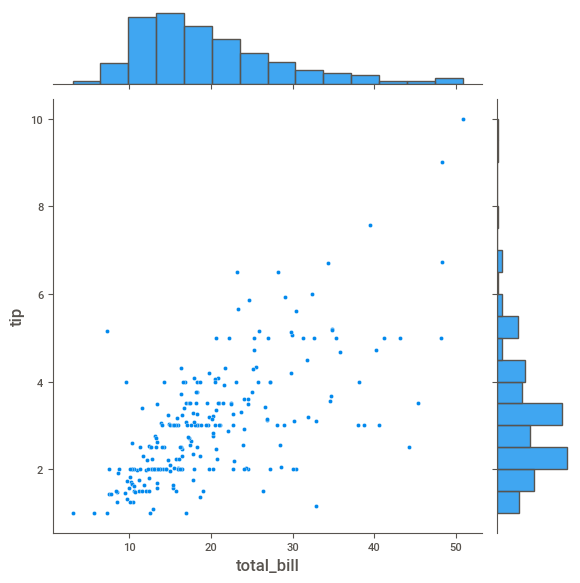

In [43]:
#Joinplot kind ='kde'
#It is used to draw a plot of two variables with bivariate and univariate graphs. It basically combines two different plot
sns.jointplot(x ='total_bill', y ='tip', data = a)


<AxesSubplot:ylabel='Density'>

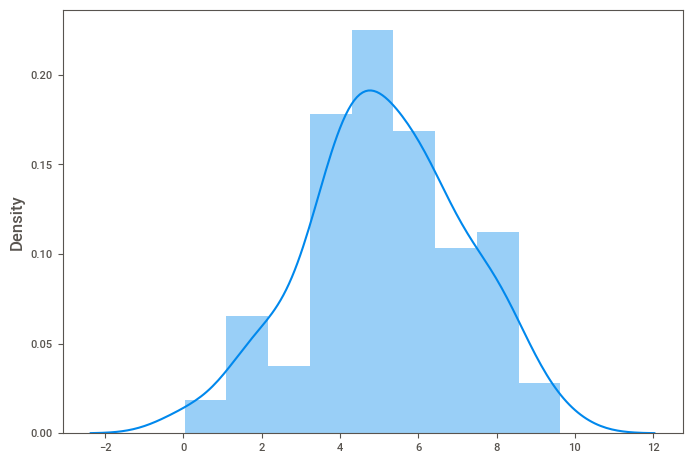

In [44]:
from scipy import stats
c=np.random.normal(loc=5,size=100,scale=2)
sns.distplot(c)


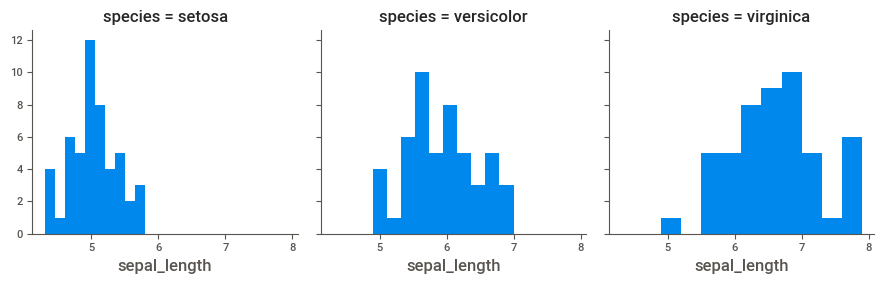

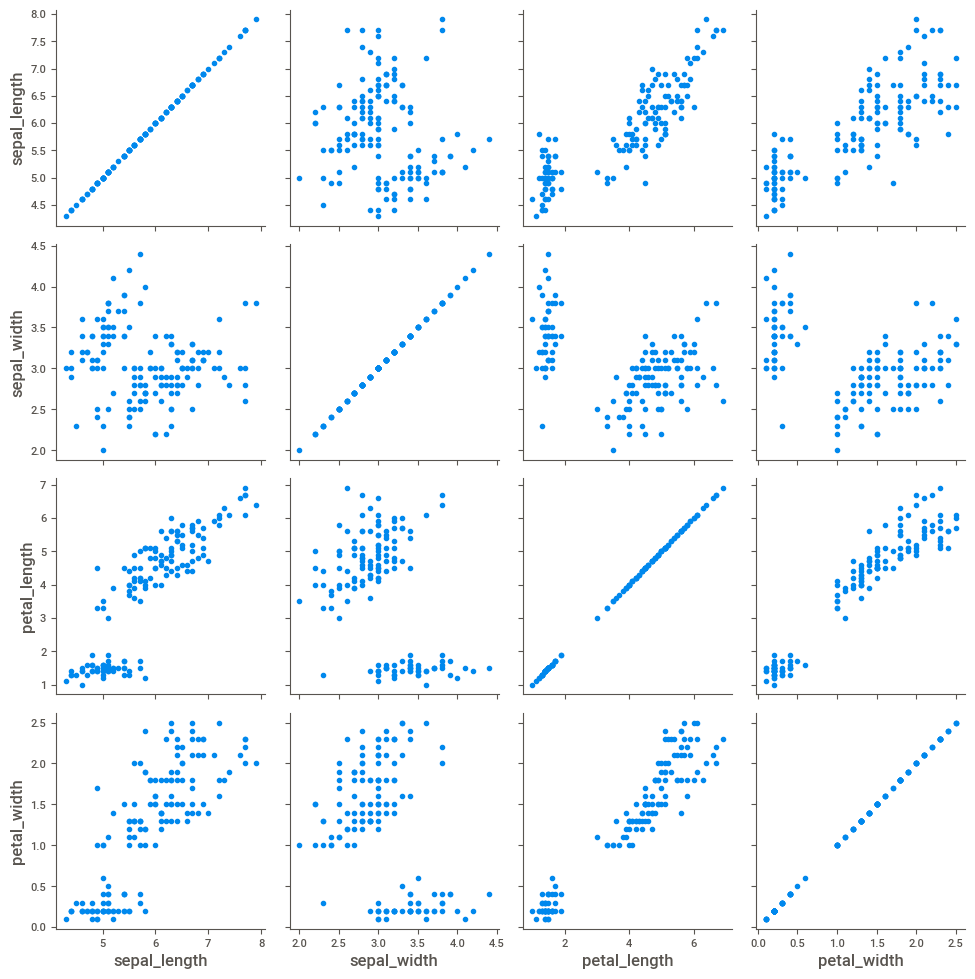

In [45]:
#Grid Plot
c=sns.load_dataset('iris')
d=sns.FacetGrid(c,col='species')
d.map(plt.hist,'sepal_length')

d=sns.PairGrid(c)
d.map(plt.scatter)
